# Caos II: el mapa logístico

## **Ejercicio 1)** Importando librerías

Importe las librerías `numpy` para operar con arrays, `scipy` para utilizar rutinas de algebra lineal y `matplotlib.pyplot` para graficar.

In [1]:
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

## **Ejercicio 2)** El mapa logístico

### Teoría

#### Dinámicas a tiempo discreto.

Nos interesa considerar dinámicas a tiempos discretos.
Estas suelen estar determinadas por ecuaciones de la forma


\begin{equation}
\begin{aligned}
x_{t+1}
&=&
f(x_t)
\end{aligned}
\end{equation}


donde $x_t\in X$ especifica el estado del sistema para cada tiempo $t\in\{0,1,2,...\}$.

Para obtener una trayectoria del sistema anterior, se elige una condición inicial $x_0$ y se itera el mapa para obtener $x_1$, $x_2$, ..., $x_t$, ..., etc.

#### Ciclos límites

Un punto fijo $x^*$ de una dinámica a tiempos discretos queda definido por la condición

\begin{equation}
\begin{aligned}
x^*&=&f(x^*)
\end{aligned}
\end{equation}

Un ciclo límite de período 2 queda definido por las condiciones

\begin{equation}
\begin{aligned}
x^*&=&f(f(x^*))
\end{aligned}
\end{equation}

y

\begin{equation}
\begin{aligned}
x^*&\neq &f(x^*)
\end{aligned}
\end{equation}

para algún $x^*$.

Más generalmente, un ciclo límite de período $n$ queda definido por las condiciones

\begin{equation}
\begin{aligned}
x^*&=&f_n(x^*)
\end{aligned}
\end{equation}

y

\begin{equation}
\begin{aligned}
x^*&\neq&f_{n-1}(x^*)
\end{aligned}
\end{equation}

para algún $x^*$, donde $f_n(x) = f(f_{n-1}(x))$ para todo $x$ y $n>1$, y $f_1=f$.

#### Estabilidad de los ciclos límites

Sea $x^*$ un ciclo límite de período $n$.
Luego

\begin{equation}
\begin{aligned}
x^* + \epsilon_{t+1} &= f_n(x^* + \epsilon_t) \\
                      &= f_n(x^*) + f_n'(x^*) \epsilon_t + \dots \\
                      &= x^* + f_n'(x^*) \epsilon_t + \dots
\end{aligned}
\end{equation}

Entonces,

\begin{equation}
\begin{aligned}
\epsilon_{t+1} &= f_n'(x^*) \epsilon_t + \dots \\
\left| \epsilon_{t+1} \right| &= \left| f_n'(x^*) \epsilon_t + \dots \right| \\
\left| \epsilon_{t+1} \right| &\leq \left| f_n'(x^*) \epsilon_t \right| + \dots \\
\left| \epsilon_{t+1} \right| &\leq \left| f_n'(x^*) \right| \left| \epsilon_t \right| + \dots
\end{aligned}
\end{equation}


Entonces, si $\epsilon_t$ es lo suficientemente chico como para poder despreciar los ordenes superiores, se obtiene que $|\epsilon_t|$ decrece con $t$ si $|f'(x^*)| < 1$, en cuyo caso se dice que $x^*$ pertenece a un ciclo límite linealmente estable.

Por el contrario, $|\epsilon_t|$ crece con $t$ si $|f'(x^*)| > 1$, en cuyo caso se dice que $x^*$ pertenece a un ciclo límite linealmente inestable.

Si $|f'(x^*)| = 1$, se dice que el ciclo límite es linealmente marginal.
En cuyo caso se necesitan considerar derivadas de órdenes superiores para poder determinar la estabilidad del ciclo límite.

#### El mapa logístico

El mapa logístico constituye una ecuación a tiempos discretos en donde $X=[0,1]$,

\begin{equation}
\begin{aligned}
x_{t+1}
&=&
f(x_t)
\\
&=&
rx_t(1-x_t)
\end{aligned}
\end{equation}

y $r\in [0,4]$ es un parámetro.

**1)** Encuentre los puntos fijos (ciclos límite de período 1) de la ecuación logística.

**2)** Determine la estabilidad de los mismos.

**3)** Compute y grafique 100 pasos temporales de las trayectorias para:

&nbsp; &nbsp; **i)** $x_0=0.8$ y $r=1$,

&nbsp; &nbsp; **ii)** $x_0=0.1$ y $r=3$, y

&nbsp; &nbsp; **iii)** $x_0=0.75$ y $r=3.8$.

**4)** Compute y grafique 100 pasos temporales del diagrama de Verhulst para:

&nbsp; &nbsp; **i)** $x_0=0.8$ y $r=1.1$,

&nbsp; &nbsp; **ii)** $x_0=0.1$ y $r=3.5$, y

&nbsp; &nbsp; **iii)** $x_0=0.75$ y $r=3.8$.

**5)** Grafique el diagrama de bifurcaciones del mapa logístico.

**6)** Grafique el exponente de Lyapunov vs $r$ del mapa logístico. El exponente se define por

\begin{equation}
\begin{aligned}
\lambda
&=&
\lim_{n\to \infty}
\frac{1}{n}
\sum_{t=0}^{n-1}
\ln |f'(x_t)|
\end{aligned}
\end{equation}

In [2]:
# 2.1)

Los puntos fijos de la ecuación logìstica son

\begin{align*} 
x &= f(x)\\ 
x &= rx(1-x)\\
x &= rx - rx^2\\
0 &= x(r-1)-rx^2\\
0 &= x((r-1)-rx)
\end{align*}

Esta ecuación se satisfase si 

\begin{equation}
x = 0
\end{equation}

También

\begin{align*} 
rx &= r-1\\
x &= \frac{r-1}{r}\\
x &= 1 - r^{-1}

\end{align*}


In [3]:
# 2.2)

Se tiene 

\begin{equation}
f'(x) = r(1-2x)
\end{equation}

Entonces 

\begin{equation}
f'(0) = r>0
\end{equation}

Luego, $x=0$ es un punto fijo linealmente inestable para todo $r$

De forma similar

\begin{align*} 
f'(1-r^{-1}) &= r(1-2(1-r^{-1}))\\
             &= r(1-2+2r^{-1})\\
             &= r(-1+2r^{-1})\\
             &= -r+2
\end{align*} 

Por lo tanto, $x=1-r^{-1}$ es un punto fijo linealmente estable si $|2-r| < 1$, si $r\in{(1,3)}$. Por otro lado, es linealmente inestalbe si $|2-r| > 1$, si $r\in{[0,1) \cup (3,\infty)}$. Finalmente, es linealmente marginal si $|2-r| = 1$, si $r=1$ o $r=3$


In [24]:
# 2.3)

def f(x, r):
    return r * x * (1 - x)

def plot_trayectoria(f, x0, r, k):
    x = np.zeros(k+1)
    t = np.array(range(k+1))
    x[0] = x0

    for i in range(k):
        x[i+1] = f(x[i], r)

    plt.xlabel('$t$')
    plt.ylabel('$x(t)$')
    plt.plot(t, x) 
    plt.title('$r='+str(r)+'$')

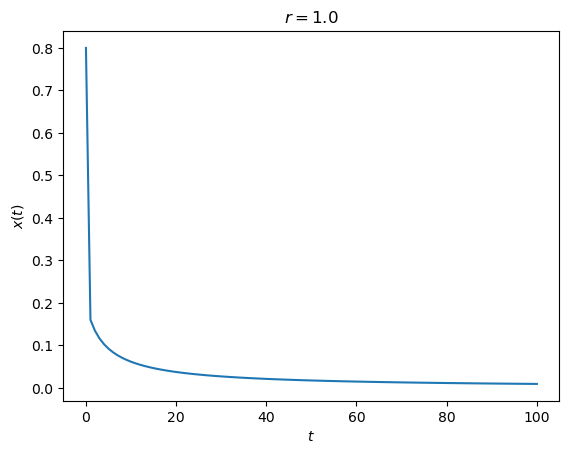

In [27]:
# 2.3.i)

x0 = 0.8
r = 1.0
k = 100

plot_trayectoria(f, x0, r, k)

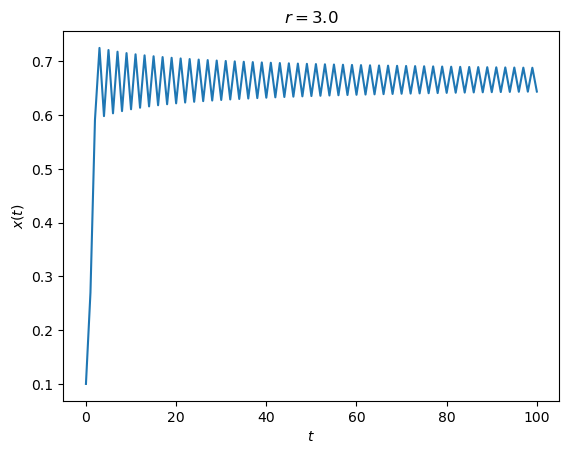

In [32]:
# 2.3.ii)

x0 = 0.1
r = 3.0
k = 100

plot_trayectoria(f, x0, r, k)

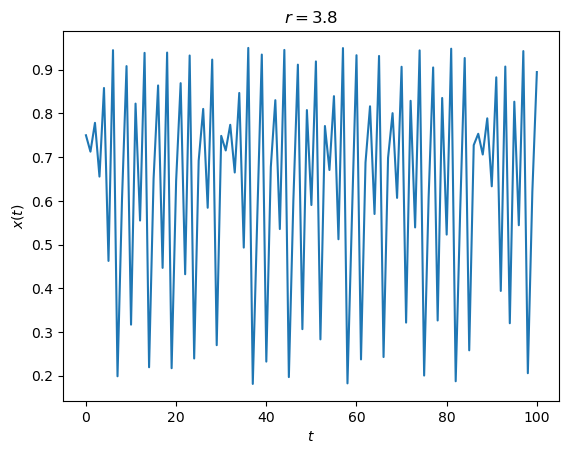

In [30]:
# 2.3.iii)

x0 = 0.75
r = 3.8
k = 100

plot_trayectoria(f, x0, r, k)

In [33]:
# 2.5)

def plot_mapa(f, rmin, rmax, num_samples=300, tmax=200, title=""):
    plt.title('Diagrama de bifurcaciones: ' + title)
    plt.xlabel('$r$')
    plt.ylabel('$x$')
    vecr=[]
    vecx=[]
    for r in np.linspace(rmin, rmax, num_samples):
        for sample in range(num_samples):
            x = np.random.rand()
            for t in range(tmax):
                x = f(x, r)
            vecr.append(r)
            vecx.append(x)
    plt.scatter(vecr, vecx, c='r', s=1)
    plt.show()

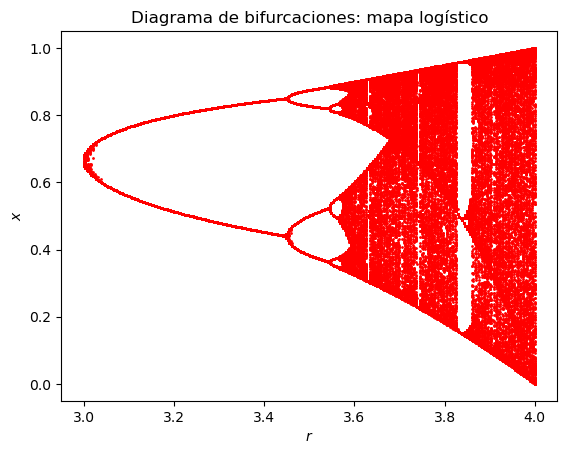

In [34]:
plot_mapa(f, 3, 4, title='mapa logístico')

In [35]:
# 2.6)

def lyapunov(f, df, termalization=300, samples=10000):
    x = np.random.rand()
    suma = 0.0

    for t in range(termalization):
        x = f(x)

    for t in range(samples):
        x = f(x)
        y = np.abs(df(x))
        z = np.log(y+0.00000001)
        suma += z

    return suma/samples

In [41]:
def plot_lyapunov(f, df, r_list, termalization=300, samples=10000, title=''):
    l_list = []
    for r in r_list:
        l = lyapunov(lambda x:f(x, r), lambda x:df(x, r), termalization=termalization, samples=samples)
        l_list.append(l)
    plt.plot(r_list,0*r_list, c='grey', linestyle=':')
    plt.xlabel('$r$')
    plt.ylabel('$\lambda$')
    plt.title('Exponente de Lyapunov: ' + title)
    plt.plot(r_list, l_list, c='r')
    plt.show()

In [37]:
def df(x, r):
    return r *(1 - 2.0 * x)

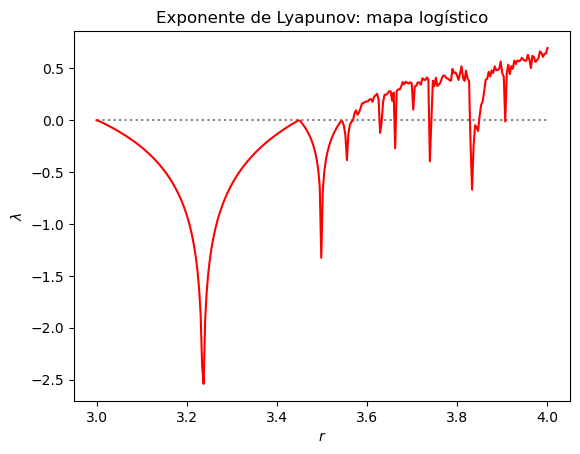

In [42]:
r_list = np.linspace(3.0, 4.0, 300)
plot_lyapunov(f, df, r_list, samples=100, title='mapa logístico')

## **Ejercicio 3)** El mapa de la carpa

Repita el ejercicio **2)** pero para el mapa de la carpa:

\begin{equation}
x_{t+1} =
\begin{cases}
rx_t & \text{si } 0 \leq x_t \leq \frac{1}{2}, \\
r(1 - x_t) & \text{si } \frac{1}{2} < x_t \leq 1
\end{cases}
\end{equation}


definido para $X=[0,1]$ y $r\in [0,2]$.

In [ ]:
# 3.1)

Para $0 \leq x \leq 1/2$, la ecuación de punto fijo es 

\begin{equation}
x = rx
\end{equation}

Lo cual tiene solución $x=0$ para todo $r$ o $x>0$, si $r=1$

Para $x > 1/2$, la ecuación de punto fijo es 

\begin{align}
x &= r(1-x) \\
x &= \frac{r}{1+r}
\end{align}

In [43]:
# 3.2)

Si $x<1/2$, luego $|f'(x)| = |r|$. Entonces, $x=0$ es linealmente estable si $r<1$.

En cambio, cuando $0<x<1/2$, la estabilidad es linealmente marginal. 

Si $x>1/2$, luego $f'(x)=|-r|$. Luego, $x>1/2$ es linealmente estable si $r<1$.

In [44]:
# 3.3)

def f(x, r):
    if x > 0.5:
        return np.abs(r*(1.0-x))
    return r*x

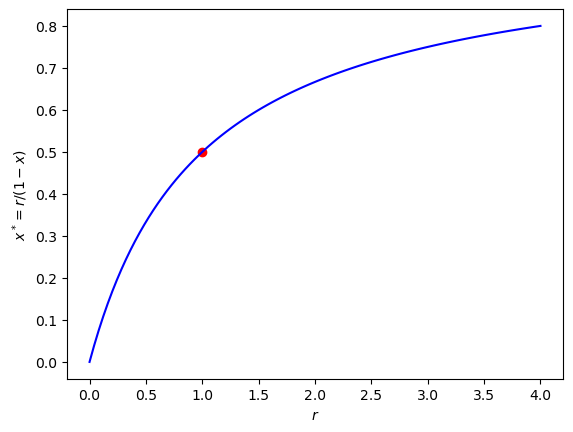

In [48]:
plt.xlabel('$r$')
plt.ylabel('$x^*=r/(1-x)$')
rvals = np.linspace(0.0, 4.0, 100)
plt.plot(rvals, [r/(1+r) for r in rvals], c='b')
rvals = [1]
plt.scatter(rvals, [r/(1+r) for r in rvals], c='r')
plt.show()

## **Ejercicio 4)** El mapa del seno

Repita el ejercicio **2)** pero para el mapa del seno:

\begin{equation}
\begin{aligned}
x_{t+1}
=
r\sin(\pi x_t)
\end{aligned}
\end{equation}

definido para $X=[0,1]$ y $r\in [0,1]$.

In [ ]:
# 4.1)